# Uitwerkingen opgaven data-analyse NSP2 2020-2021

In [1]:
# %matplotlib notebook

import matplotlib.pyplot as plt
import pandas as pd
from math import sqrt, erf
import numpy as np
from lmfit import models
from scipy.stats import chi2

## Opgave 1.1

We maken gebruik van pandas, een python data-analyse pakket. We importeren de datafile:

In [2]:
data = pd.read_csv('10-metingen.csv')

In [3]:
data

,x
0,73
1,79
2,69
3,74
4,68
5,72
6,72
7,75
8,60
9,76


...en bekijken wat statistieken:

In [4]:
data.describe()

,x
count,10.000000
mean,71.800000
std,5.245104
min,60.000000
25%,69.750000
50%,72.500000
75%,74.750000
max,79.000000


De standaarddeviatie van het gemiddelde is:

In [5]:
x = data.x
x.std() / sqrt(x.count())

1.6586473739499634

Het resultaat van ons experiment is dus $x = 71.8 \pm 1.7$ of $x = 71.8(17)$.

Voor de kans op een volgende meting met $x\geq 75$ berekenen we eerst hoeveel standaarddeviaties de meting verwijderd is van het gemiddelde. Vervolgens berekenen we de kans op een meting hóger dan dat aantal standaarddeviaties. We gebruiken daarvoor de error function `erf` gedefinieerd in de `math`-bibliotheek.

In [6]:
dist = 75 - x.mean()
dist_sigma = dist / x.std()
(1 - erf(dist_sigma / sqrt(2))) / 2

0.2709001618069287

## Opgave 1.2

We gaan plotten, en we moeten `matplotlib` vertellen dat we interactieve plots in de notebook willen zien:

We openen de datafile en maken een histogram van $y$:

In [7]:
data = pd.read_csv('80-metingen.csv')
data.describe()

,y
count,80.000000
mean,61.587500
std,16.779051
min,22.000000
25%,49.000000
50%,63.500000
75%,75.000000
max,91.000000


<AxesSubplot:>

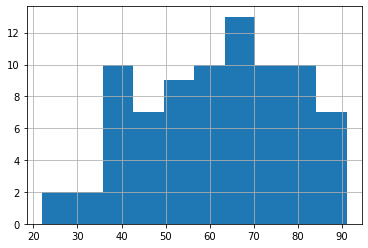

In [8]:
data.y.hist()

Je kunt de grenzen van de bins wel een stuk mooier krijgen. Niet simpelweg het minimum en het maximum nemen en opdelen, zoals pandas nu standaard doet, maar afronden op mooie, ronde getallen. Dat kan ook maar is iets meer werk. Voor stapgroottes kun je het beste `arange` gebruiken. Let er daarbij wel op dat `arange` niet inclusief is. Het maximum wordt niet meegenomen. Als je dat ietsje groter maakt dan de bingrens, dus 101 i.p.v. 100, dan komt het goed:

Text(0, 0.5, 'Count')

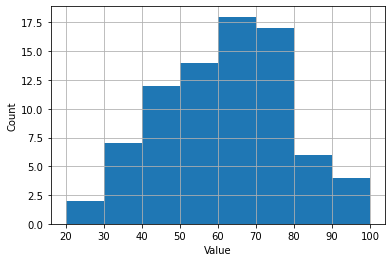

In [9]:
bins = np.arange(20, 101, 10)

plt.figure()
data.y.hist(bins=bins)
plt.xlabel("Value")
plt.ylabel("Count")

### Fitten aan een histogram

Als je least-squares wilt fitten, gebruik dan de `lmfit` bibliotheek. Die is handiger dan `scipy` gebruiken.

We moeten om te kunnen fitten een set datapunten hebben. Voor de punten nemen we het aantal waardes in een bin als $y$-waarde en het centrum tussen de bingrenzen als $x$-waarde. Voor het berekenen van de $x$-waardes gebruiken we een `NumPy`-trucje om parallele berekeningen uit te voeren door het gebruik van lijsten:

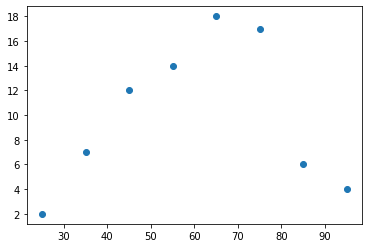

In [10]:
y, bins = np.histogram(data.y, bins=bins)
x = (bins[:-1] + bins[1:]) / 2

plt.figure()
plt.scatter(x, y)

Je kunt veel verschillende modellen gebruiken, b.v. een `GaussianModel`. De werkwijze is als volgt: éérst initialiseer je het model en vervolgens voer je de fit uit. Het is handig om voor de fit een *first guess* op te geven, een afschatting van de parameters. Je kunt dit handmatig doen, maar wij gebruiken hier de method `guess` van het model. Dit geeft een afschatting van de parameters...

In [11]:
gauss = models.GaussianModel()
first_guess = gauss.guess(y, x)
first_guess

name,value,initial value,min,max,vary,expression
amplitude,720.000000,None,-inf,inf,True,
center,60.0000000,None,-inf,inf,True,
sigma,15.0000000,None,0.00000000,inf,True,
fwhm,35.3223000,None,-inf,inf,False,2.3548200*sigma
height,19.1492304,None,-inf,inf,False,"0.3989423*amplitude/max(2.220446049250313e-16, sigma)"


...die je vervolgens in de fit kunt stoppen. Denk hierbij aan de fout op de datapunten. In de fit kun je een *gewicht* toekennen, dat omgekeerd evenredig is met de fout.

In [12]:
fit = gauss.fit(y, x=x, weights=1 / np.sqrt(y), params=first_guess)
fit

Text(0, 0.5, 'Count')

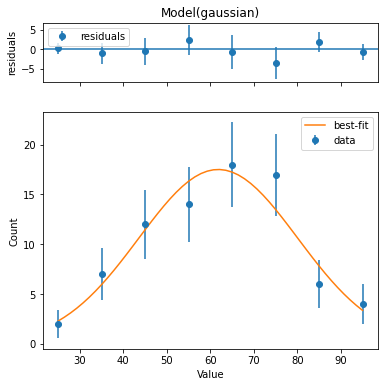

In [13]:
fit.plot(numpoints=50)
plt.xlabel("Value")
plt.ylabel("Count")

### Afhankelijkheid van binkeuze

Bovenstaande fit ziet er prachtig uit. Toch is er nog een subtiliteit: het histogram hangt nogal af van de keuze voor de bins. In bovenstaand voorbeeld hadden we de bins zelf gekozen. Een andere keuze voor de bins, levert een andere fit op:

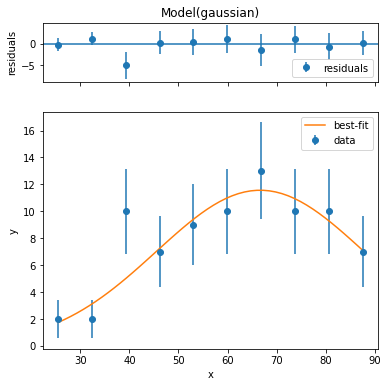

In [14]:
y, bins = np.histogram(data.y)
x = (bins[:-1] + bins[1:]) / 2

first_guess = gauss.guess(y, x)
fit = gauss.fit(y, x=x, weights=1 / np.sqrt(y), params=first_guess)
fit.plot(numpoints=50)
fit

Deze fit heeft een iets ander centrum en een andere breedte.

## Opgave 1.3

We hebben 17 studenten (de eerste telt niet mee) en het experiment is 10 keer herhaald. Hieronder volgt alleen de uitwerking van methode 1.

In [15]:
N = 16
M = 10

In [16]:
t_kuit_j = [5.7, 4.24, 3.51, 3.61, 3.35, 3.50, 3.24, 3.25, 3.04, 2.96]
t_kuit = np.mean(t_kuit_j)
dt_kuit = np.std(t_kuit_j) / np.sqrt(M)

print(f"Gemiddelde: {t_kuit:.2f}, standaarddeviatie v/h gemiddelde: {dt_kuit:.2f}")

Gemiddelde: 3.64, standaarddeviatie v/h gemiddelde: 0.24


In [17]:
t_schouder_j = [3.27, 2.9, 2.67, 2.4, 2.43, 2.44, 2.35, 2.14, 2.11, 1.78]
t_schouder = np.mean(t_schouder_j)
dt_schouder = np.std(t_schouder_j) / np.sqrt(M)

print(f"Gemiddelde: {t_schouder:.2f}, standaarddeviatie v/h gemiddelde: {dt_schouder:.2f}")

Gemiddelde: 2.45, standaarddeviatie v/h gemiddelde: 0.13


In [18]:
t_zenuw = t_kuit - t_schouder
dt_zenuw = np.sqrt(dt_kuit ** 2 + dt_schouder ** 2)

print(f"Transporttijd: {t_zenuw:.2f} +/- {dt_zenuw:.2f}")

Transporttijd: 1.19 +/- 0.27


In [19]:
v_zenuw = N * 1.50 / t_zenuw
dv_zenuw = v_zenuw * np.sqrt((0.1 / 1.5) ** 2 + (dt_zenuw / t_zenuw) ** 2)

print(f"Snelheid: {v_zenuw:.2f} +/- {dv_zenuw:.2f}")

Snelheid: 20.15 +/- 4.81


## Opgave 1.4

We importeren de dataset en kijken even of dat goed ging.

In [20]:
data = pd.read_csv('verval.csv')

In [21]:
data

,tijd,counts
0,0,1265
1,1,688
2,2,410
3,3,241
4,4,132
5,5,93
6,6,41
7,7,29
8,8,30


We zien een kolom **tijd** en een kolom **counts**, met negen meetpunten. De fouten op de meetpunten stonden niet in het bestand, maar wel in de opgave. De fout op het aantal counts $N$ wordt gegeven door $\sqrt N$. We maken een nieuwe kolom `yerr` als volgt:

In [22]:
data['yerr'] = np.sqrt(data.counts)

Merk op dat we de data nu kunnen bekijken door zowel `data['yerr']` als `data.yerr` te typen, maar dat we nieuwe kolommen alléén kunnen maken met de `data['yerr']`-notatie. We inspecteren even de eerste vijf regels om te zien of alles goed ging:

In [23]:
data.head()

,tijd,counts,yerr
0,0,1265,35.566838
1,1,688,26.229754
2,2,410,20.248457
3,3,241,15.524175
4,4,132,11.489125


We maken een plot van counts tegen tijd, met de juiste foutvlaggen:

<AxesSubplot:xlabel='tijd', ylabel='counts'>

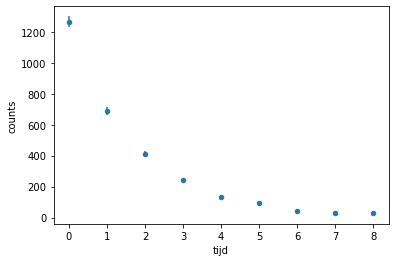

In [24]:
data.plot.scatter('tijd', 'counts', yerr='yerr')

De vraag is nu hoe we het beste om kunnen gaan met de achtergrond. Eenvoudig negeren, fitten aan een exponentiële functie plus een constante achtergrond of de achtergrond éérst aftrekken van de data? We bekijken hieronder de drie methodes.

### Methode A: negeren van de achtergrond

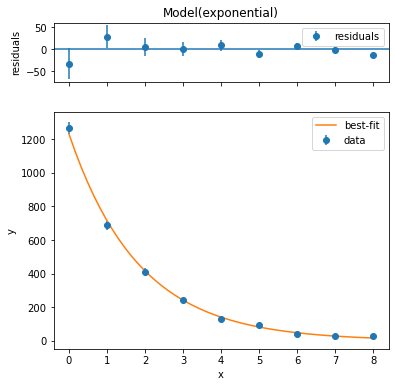

In [25]:
model = models.ExponentialModel()
fit = model.fit(data.counts, x=data.tijd, weights=1 / data.yerr)
fit.plot(numpoints=50)
fit

Op het oog ziet dit er prima uit, maar $\chi_\mathrm{red}^2 = 1.659$, vrij groot. Aan de residuals is nog niet heel veel te zien. Je moet langer doormeten om duidelijk te kunnen zien dat de exponentiële functie naar nul gaat, terwijl de metingen dat niet doen.

### Methode B: fitten aan exponentiële functie plus constante achtergrond

We kunnen met `lmfit` eenvoudig modellen optellen:

In [26]:
model = models.ExponentialModel() + models.ConstantModel()

Vervolgens fitten we dit model aan de data en bekijken het resultaat:

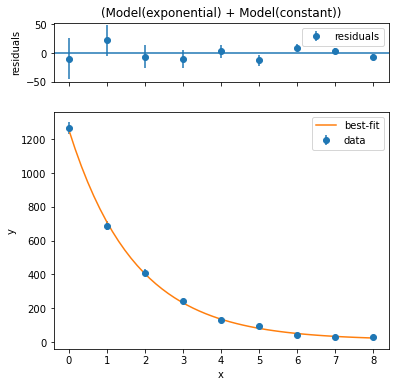

In [27]:
fit = model.fit(data.counts, x=data.tijd, weights=1 / data.yerr)
fit.plot(numpoints=50)
fit

Dat is een mooi resultaat. Op het oog gaat de fit goed door de punten en $\chi^2_\mathrm{red} = 1.167$. Dit resultaat is waarschijnlijker dan het resultaat van methode A, waar we de achtergrond negeren.

### Methode C: Achtergrond van de data aftrekken

Uit de opgave weten we dat er wel degelijk een achtergrond is, en dat die bepaald is op gemiddeld 12 counts per minuut. We kunnen een nieuwe kolom maken:

In [28]:
data['nobkg'] = data.counts - 12

De vraag is nu: wat doen we met de fout op deze data? Gebruiken we dezelfde fout als eerst? Maar dat was de wortel van het aantal counts mét achtergrond. De wortel van het aantal counts zónder achtergrond, dus `sqrt(data.nobkg)`, ligt voor de hand maar is niet juist. Niet elke meting had immers precies 12 counts aan achtergrond. We trekken 12 counts af, maar de verwachte onzekerheid op het *meten* van de achtergrond is $\sqrt{12}$. Dat telt mee.

We moeten de regels voor de foutenberekening aanroepen: $N_\mathrm{nobkg} = N - N_\mathrm{bkg}$. Dus de onzekerheid wordt gegeven door $\delta N_\mathrm{nobkg} = \sqrt{(\delta N)^2 + (\delta N_\mathrm{bkg})^2}$. De onzekerheid wordt, na aftrekken van de achtergrond, dus eigenlijk zelfs *groter*. Nu was de achtergrond gelukkig heel nauwkeurig bepaald, dus de onzekerheid op de grootte van de achtergrond is verwaarloosbaar klein. Dat betekent dat $\delta N_\mathrm{nobkg} = \delta N = \sqrt{N}$. We houden dus de oorspronkelijke onzekerheid.

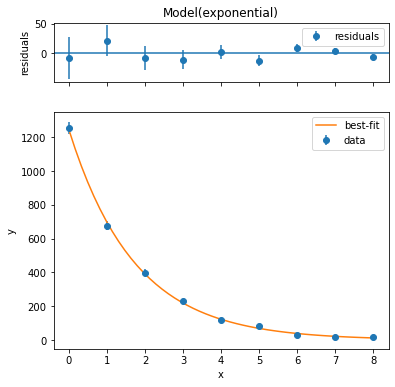

In [29]:
model = models.ExponentialModel()
fit = model.fit(data.nobkg, x=data.tijd, weights=1 / data.yerr)
fit.plot(numpoints=50)
fit

De $\chi_\mathrm{red}^2 = 1.005$. Dit is dus de meest nauwkeurige methode om de halfwaardetijd te bepalen. De halfwaardetijd wordt gegeven door $t_{1/2} = \lambda\ln 2$.

In [30]:
t_half = fit.params['decay'].value * np.log(2)
dt_half = fit.params['decay'].stderr * np.log(2)
print(f"Halfwaardetijd: {t_half:.3f} +- {dt_half:.3f} s.")

Halfwaardetijd: 1.196 +- 0.027 s.


Dus $t_{1/2} = 1.196$ s. Het kan makkelijker zijn om een eigen model te maken, waar $t_{1/2}$ expliciet in voorkomt: $N(t) = N_0 \cdot \frac{1}{2}^{t/t_{1/2}}$.

In [31]:
verval = models.Model(lambda t, N0, thalf: N0 * .5 ** (t / thalf))

Meestal moeten we een schatting opgeven van de parameters. Zonder die schatting is het goed mogelijk dat het fit-algoritme zoekt bij zulke onrealistische waardes dat er 'oneindig' uit de functie komt. Daar kan het algoritme niet goed mee omgaan. We kiezen gewoon de waarde 1 voor beide parameters:

In [32]:
guess = verval.make_params(N0=1, thalf=1)

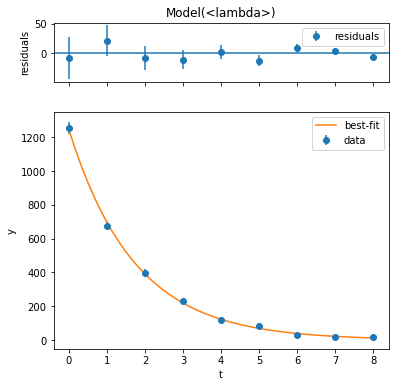

In [33]:
fit = verval.fit(data.nobkg, t=data.tijd, weights=1 / data.yerr, params=guess)
fit.plot(numpoints=50)
fit

En we lezen nu meteen af dat $t_{1/2} = 1.196 \pm 0.027$ s, ofwel $t_{1/2} = 1.196(27)$ s. Hetzelde resultaat als eerst, maar met iets minder rekenwerk.

## Casus 1 - biomechanica

In [34]:
df = pd.read_csv('squat.csv')

In [35]:
df

,stance width,impulse,error
0,0,161.170658,6.005381
1,10,171.565045,3.825325
2,20,171.038662,3.080887
3,30,175.302728,5.350336
4,40,193.371009,6.911534
5,50,177.071976,0.703771
6,60,188.268868,7.498550
7,70,184.368025,4.715182
8,80,170.993129,2.384634


Text(0, 0.5, 'impulsverandering (kg m/s$^2$)')

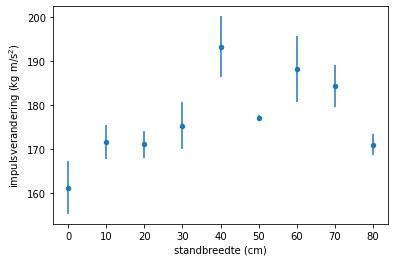

In [36]:
df.plot.scatter('stance width', 'impulse', yerr='error')
plt.xlabel("standbreedte (cm)")
plt.ylabel("impulsverandering (kg m/s$^2$)")

Je kunt, na een fit, met Python ook de p-waarde berekenen. Bedenk: dat is de kans op een meting met een $\tilde\chi^2$-waarde net zo groot of groter dan de waarde die je hebt gevonden, *als het model klopt*. Hoe kleiner die kans, hoe kleiner de kans dat je model klopt. Python heeft een $\chi^2$-distributie in de `scipy.stats` module. De `cdf`, de cumulatieve dichtheidsfunctie, geeft de kans op een *kleinere* $\chi^2$-waarde. Let op dat je de *gewone* $\chi^2$-waarde gebruikt en dat je ook het aantal vrijheidsgraden (aantal meetpunten - aantal parameters) moet opgeven. Die zijn allebei beschikbaar via `fit.chisqr` en `fit.nfree`.

P-value: 0.0003815006020080336


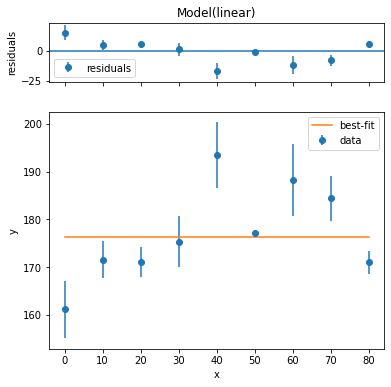

In [37]:
model = models.LinearModel()
params = model.make_params(slope=0)
params['slope'].vary = False
fit = model.fit(df['impulse'], x=df['stance width'], weights=1/df['error'], params=params)
fit.plot()
print(f"P-value: {1 - chi2.cdf(fit.chisqr, fit.nfree)}")
fit

P-value: 0.037356372999919785


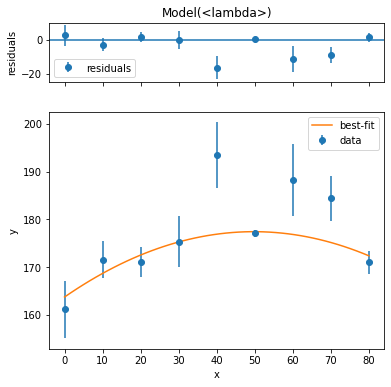

In [38]:
f = lambda x, x_0, A, B: A + B * (x - x_0) ** 2
model = models.Model(f)
fit = model.fit(df['impulse'], x=df['stance width'], weights=1/df['error'], x_0=0, A=0, B=1)
fit.plot(numpoints=50)
print(f"P-value: {1 - chi2.cdf(fit.chisqr, fit.nfree)}")
fit

In [39]:
df['error_c'] = sqrt((df.error ** 2).sum() / 9)

In [40]:
df

,stance width,impulse,error,error_c
0,0,161.170658,6.005381,4.957911
1,10,171.565045,3.825325,4.957911
2,20,171.038662,3.080887,4.957911
3,30,175.302728,5.350336,4.957911
4,40,193.371009,6.911534,4.957911
5,50,177.071976,0.703771,4.957911
6,60,188.268868,7.498550,4.957911
7,70,184.368025,4.715182,4.957911
8,80,170.993129,2.384634,4.957911


P-value: 6.962540275134987e-05


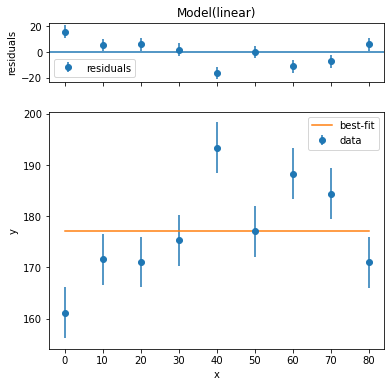

In [41]:
model = models.LinearModel()
params = model.make_params(slope=0)
params['slope'].vary = False
fit = model.fit(df['impulse'], x=df['stance width'], weights=1/df['error_c'], params=params)
fit.plot()
print(f"P-value: {1 - chi2.cdf(fit.chisqr, fit.nfree)}")
fit

P-value: 0.09050124756292677


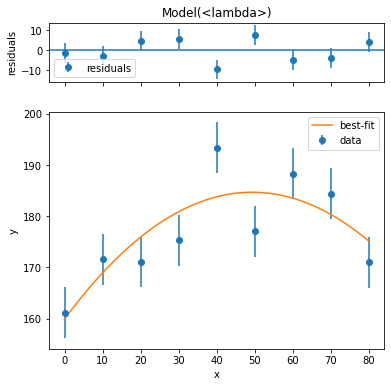

In [42]:
f = lambda x, x_0, A, B: A + B * (x - x_0) ** 2
model = models.Model(f)
fit = model.fit(df['impulse'], x=df['stance width'], weights=1/df['error_c'], x_0=0, A=0, B=1)
fit.plot(numpoints=50)
print(f"P-value: {1 - chi2.cdf(fit.chisqr, fit.nfree)}")
fit

## Casus 2 - röntgenfluorescentie

In [43]:
df = pd.read_csv("X-ray.csv")

In [44]:
df

,energy,counts,error
0,0.058594,4.096653,0.943276
1,0.117188,4.115930,0.950058
2,0.175781,4.819358,0.956939
3,0.234375,4.155654,0.963920
4,0.292969,3.184677,0.971004
...,...,...,...
251,14.765625,4.328143,1.194617
252,14.824219,4.644998,1.183907
253,14.882812,4.157970,1.173388
254,14.941406,2.322101,1.163054


<AxesSubplot:xlabel='energy', ylabel='counts'>

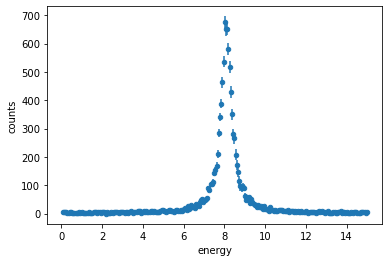

In [45]:
df.plot.scatter('energy', 'counts', yerr='error')

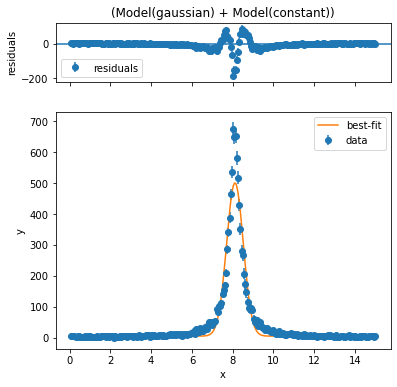

In [46]:
model = models.GaussianModel() + models.ConstantModel()
fit = model.fit(df['counts'], x=df['energy'], weights=1/df['error'], center=8)
fit.plot()
fit

In [47]:
df = pd.read_csv('X-ray-invar.csv')

In [48]:
df

,energy,counts,error
0,0.058594,2.531965,1.158990
1,0.117188,3.951948,1.169313
2,0.175781,4.689784,1.179822
3,0.234375,6.036497,1.190523
4,0.292969,2.241993,1.201422
...,...,...,...
251,14.765625,3.346320,0.977421
252,14.824219,4.978718,0.970202
253,14.882812,1.386599,0.963091
254,14.941406,2.722878,0.956083


<AxesSubplot:xlabel='energy', ylabel='counts'>

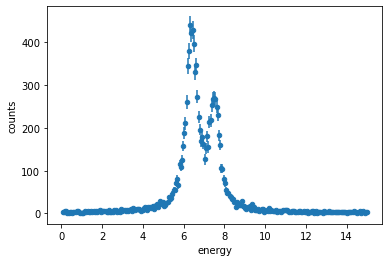

In [49]:
df.plot.scatter('energy', 'counts', yerr='error')

Merk op dat er voor zo'n relatief ingewikkeld model (veel parameters) goede beginwaardes gekozen moeten worden.

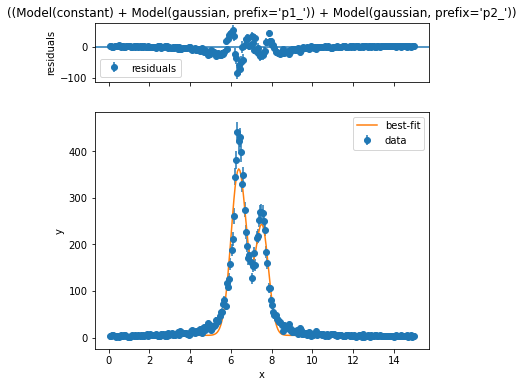

In [50]:
model = models.ConstantModel() + models.GaussianModel(prefix='p1_') + models.GaussianModel(prefix='p2_')
fit = model.fit(df['counts'], x=df['energy'], weights=1/df['error'], p1_center=6.5, p2_center=7.5, p1_sigma=.2,
                p2_sigma=.2, p1_amplitude=450, p2_amplitude=250)
fit.plot()
fit